In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from sklearn.ensemble import RandomForestClassifier
import sklearn
import matplotlib.pyplot as plt
import sys
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_sas('c:/users/nb-0242/desktop/PHR/질병관리본부/HN17_ALL.sas7bdat', encoding='latin-1')

# 전처리

<h3> 가중치 관련 변수 제거

In [3]:
r = re.compile('^wt_*')
wt_var = list(filter(r.match, data.columns))
wt_var

['wt_hs',
 'wt_itvex',
 'wt_pft',
 'wt_hm',
 'wt_ex1',
 'wt_ntr',
 'wt_tot',
 'wt_pfhm',
 'wt_pfnt',
 'wt_hmnt',
 'wt_pfhmnt',
 'wt_ex1nt',
 'wt_ex1hm',
 'wt_ex1pf',
 'wt_tot1',
 'wt_ex1pfnt',
 'wt_ex1hmnt',
 'wt_tot1nt']

In [4]:
train_data = data.iloc[:, ~data.columns.isin(wt_var)]

<h3> 결측치가 1000개 이상인 변수 제거하기

In [5]:
train_data_ = train_data.iloc[:, train_data.isnull().sum().values < 1000]

In [6]:
max(train_data_.isnull().sum())

964

In [7]:
train_data_.shape

(8127, 496)

In [8]:
train_data_.iloc[:, train_data_.isnull().sum().values >1].isnull().sum()

incm           28
ho_incm        28
incm5          28
ho_incm5       28
edu           798
ainc           28
D_1_1         428
D_2_1         428
D_2_wk        428
DI1_dg        428
DI1_ag        428
DI1_pr        428
DI1_pt        428
DI1_2         428
DI2_dg        428
DI2_ag        428
DI2_pr        428
DI2_pt        428
DI2_2         428
DI3_dg        428
DI3_ag        428
DI3_pr        428
DI3_pt        428
DI3_2         428
DI4_dg        766
DI4_pr        766
DI4_pt        766
DI5_dg        428
DI5_ag        428
DI5_pr        428
             ... 
N_DAY         964
N_INTK        960
N_EN          960
N_WATER       960
N_PROT        960
N_FAT         960
N_SFA         960
N_MUFA        960
N_PUFA        960
N_N3          960
N_N6          960
N_CHOL        960
N_CHO         960
N_TDF         960
N_CA          960
N_PHOS        960
N_FE          960
N_NA          960
N_K           960
N_VA          960
N_VA_RAE      960
N_CAROT       960
N_RETIN       960
N_B1          960
N_B2      

# 결측치 그냥 다 버림;

In [9]:
train_data_.dropna(axis=0, inplace= True)

c:\users\nb-0242\anaconda3\envs\ximz\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
train_data_.shape

(6400, 496)

In [11]:
train_data_.reset_index(inplace=True, drop=True)
print(train_data_.shape)
train_data_.head()

(6400, 496)


,mod_d,ID,ID_fam,year,region,town_t,apt_t,psu,sex,age,...,N_VA_RAE,N_CAROT,N_RETIN,N_B1,N_B2,N_NIAC,N_VITC,LF_secur_y,LF_BUYER,LF_safe
0,2019.01.16.,A601169401,A6011694,2017.0,1.0,1.0,1.0,A601,1.0,76.0,...,107.968989,759.925836,44.641836,1.148658,0.883505,8.357358,33.239210,1.0,1.0,2.0
1,2019.01.16.,A601177901,A6011779,2017.0,1.0,1.0,1.0,A601,1.0,39.0,...,258.086652,2716.612108,31.702310,2.037906,1.542775,20.282287,64.621705,1.0,1.0,1.0
2,2019.01.16.,A601177902,A6011779,2017.0,1.0,1.0,1.0,A601,2.0,35.0,...,163.987809,1572.307650,32.962171,1.042056,0.940837,15.316899,53.504714,1.0,1.0,1.0
3,2019.01.16.,A601177903,A6011779,2017.0,1.0,1.0,1.0,A601,1.0,1.0,...,419.057128,903.445531,343.770000,0.514549,1.266080,4.822195,91.302935,1.0,1.0,1.0
4,2019.01.16.,A601208501,A6012085,2017.0,1.0,1.0,1.0,A601,1.0,71.0,...,369.152154,1621.345842,234.040000,1.485135,1.622947,15.722913,20.956242,1.0,1.0,2.0


# MODELING

In [3]:
from sklearn.ensemble import RandomForestClassifier
import sklearn

In [13]:
wi_var = ['DC1_dg', 'DC1_ag', 'DC1_pr', 'DC1_pt']

In [14]:
idx = np.random.choice(np.arange(0,6400),size=int(len(train_data_)*0.8), replace=False)

In [15]:
del train_data_['N_DAY']

In [16]:
bad_df = train_data_.index.isin(idx)

In [17]:
train_ = train_data_[bad_df]
test_ = train_data_[~bad_df]

In [18]:
train_x = train_.iloc[:,~train_.columns.isin(wi_var)].iloc[:,4:]
train_y = train_['DC1_dg']
test_x = test_.iloc[:,~test_.columns.isin(wi_var)].iloc[:,4:]
test_y = test_['DC1_dg']

In [19]:
#조사구번호를 일단 지우기
len(set(train_['psu']))
del train_x['psu']
del test_x['psu']

In [20]:
train_x.head()

,region,town_t,apt_t,sex,age,incm,ho_incm,incm5,ho_incm5,edu,...,N_VA_RAE,N_CAROT,N_RETIN,N_B1,N_B2,N_NIAC,N_VITC,LF_secur_y,LF_BUYER,LF_safe
0,1.0,1.0,1.0,1.0,76.0,3.0,1.0,3.0,2.0,3.0,...,107.968989,759.925836,44.641836,1.148658,0.883505,8.357358,33.239210,1.0,1.0,2.0
1,1.0,1.0,1.0,1.0,39.0,1.0,2.0,2.0,3.0,3.0,...,258.086652,2716.612108,31.702310,2.037906,1.542775,20.282287,64.621705,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,3.0,1.0,...,419.057128,903.445531,343.770000,0.514549,1.266080,4.822195,91.302935,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,71.0,2.0,2.0,3.0,2.0,1.0,...,369.152154,1621.345842,234.040000,1.485135,1.622947,15.722913,20.956242,1.0,1.0,2.0
5,1.0,1.0,1.0,2.0,68.0,2.0,2.0,2.0,2.0,2.0,...,217.801175,1828.243862,65.447520,1.299015,0.753211,6.786803,29.879524,1.0,1.0,2.0


In [21]:
rf = RandomForestClassifier(n_jobs=-1, )

In [22]:
rf.fit(train_x, train_y,)

c:\users\nb-0242\anaconda3\envs\ximz\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [23]:
test_yhat = rf.predict(test_x)

In [24]:
np.sum(np.equal(test_yhat, test_y.values.reshape(-1,)))/len(test_y)

0.990625

In [25]:
test_yhat

array([0., 0., 0., ..., 0., 8., 0.])

In [4]:
import matplotlib.pyplot as plt

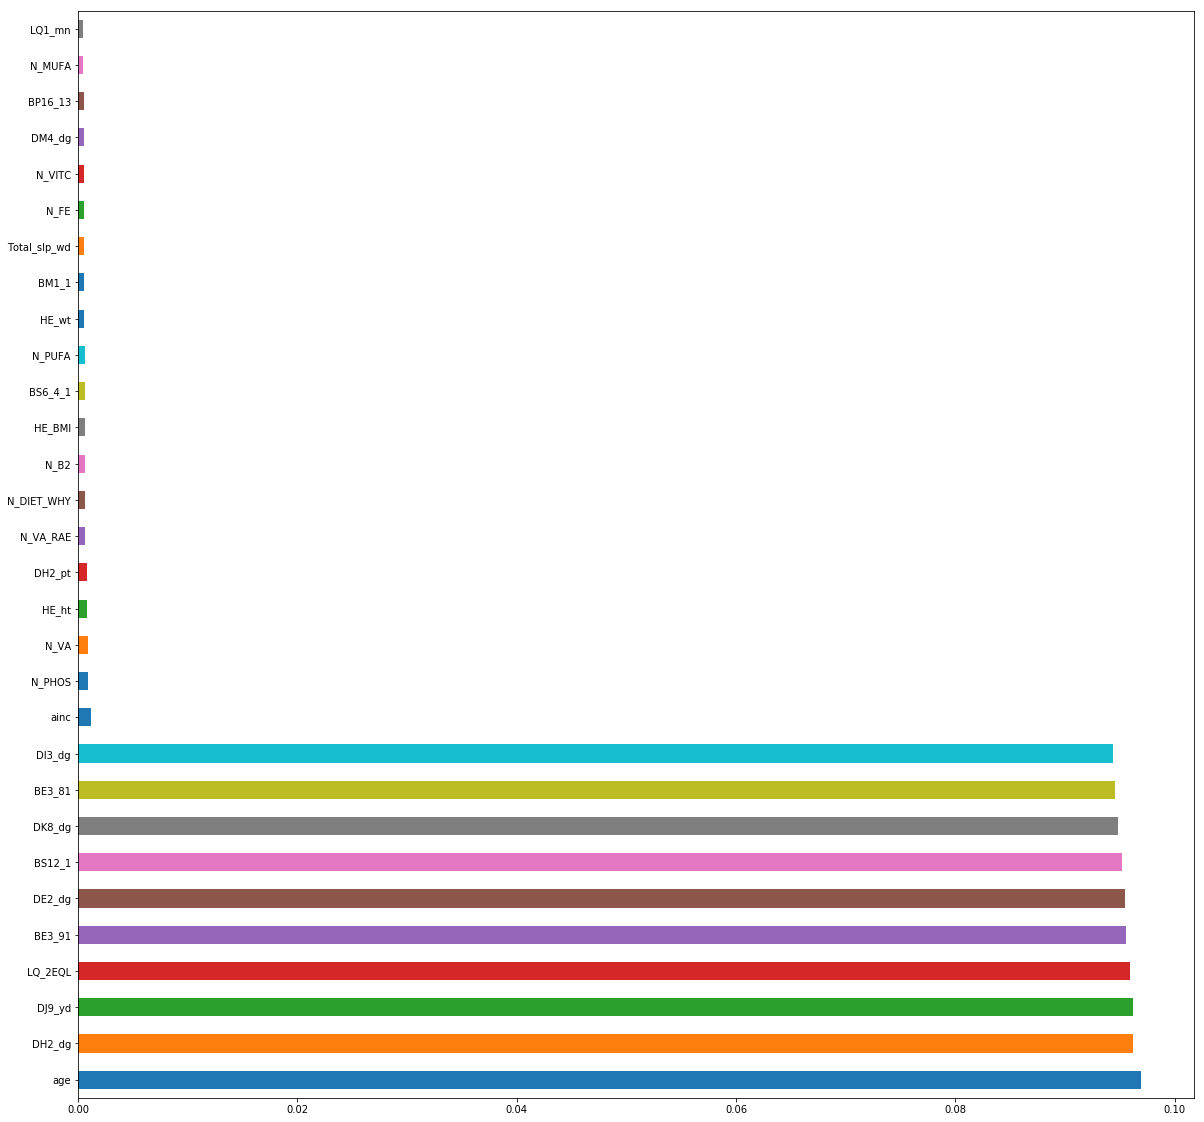

In [27]:
plt.figure(figsize=(20,20))
feat_importances = pd.Series(rf.feature_importances_, index=test_x.columns)
feat_importances.nlargest(30).plot(kind='barh')

# 첫번째 시도 중요변수
<h5>BA2_22 : 1년간 음주운전차량: 동승 횟수
<h5>DM3_dg : 류마티스성 관절염 의사진단 여부
<h5>BS12_36 : 평생사용담배종류: 피운 적 없음
<h5>DN6_yd : (소아,청소년) 요로감염 의사진단
<h5>DI4_dg : 심근경색증 또는 협심증 의사진단 여부
<h5>DK9_dg : c형감염 의사진단 여부
<h5>LQ_3EQL : 일상활동(지장있음, 없음..)
<h5>DK8_dg : b형감염 의사진단 여부
<h5>EC_lgw_2 : (성인) 최장일자리: 표준직업분류 대분류 코드+실업/비경활 상태
<h5>BE3_93 : 장소이동 신체활동 시간


In [55]:
#두 번째 시도 중요변수
feat_importances.nlargest(10)

BS1_1      0.190397
DI1_dg     0.096087
DF2_dg     0.095903
LQ_5EQL    0.095897
LQ_3EQL    0.095760
DH6_dg     0.095649
DH2_dg     0.095586
DC7_dg     0.095462
BM7        0.094866
BM14       0.001151
dtype: float64

In [28]:
#세 번째 시도 변수
feat_importances.nlargest(10)

age        0.096913
DH2_dg     0.096228
DJ9_yd     0.096206
LQ_2EQL    0.095933
BE3_91     0.095590
DE2_dg     0.095474
BS12_1     0.095183
DK8_dg     0.094812
BE3_81     0.094602
DI3_dg     0.094403
dtype: float64

<h3> 중요변수가 계속바뀌는 괴기한 현상발생

# MODELING (발병 관련변수 제거 후 재시도)

In [5]:
data = pd.read_sas('c:/users/nb-0242/desktop/PHR/질병관리본부/HN17_ALL.sas7bdat', encoding='latin-1')

In [6]:
r = re.compile('^wt_*')
wt_var = list(filter(r.match, data.columns))
pre_ = data.iloc[:, ~data.columns.isin(wt_var)]

In [7]:
r2 = re.compile('.*_[dapp][ggrt]')
disease_var = list(filter(r2.match, pre_.columns))
dis_var = disease_var[:-1]
# pre__ = pre_.iloc[:, ~pre_.columns.isin(dis_var)]

In [103]:
pre__.shape

(8127, 698)

In [87]:
data.shape

(8127, 819)

In [8]:
#결측 변수 덜고
pre__ = pre_.iloc[:, pre_.isnull().sum().values < 1000]
#결측건 덜고
pre__.dropna(axis=0, inplace= True)

c:\users\nb-0242\anaconda3\envs\ximz\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [105]:
pre__.shape

(6400, 496)

In [9]:
del pre__['N_DAY']
del pre__['psu']

In [10]:
idx = np.random.choice(np.arange(0,len(pre__)),size=int(len(pre__)*0.8), replace=False)
idx_df = pre__.index.isin(idx)
train_ = pre__[idx_df]
test_ = pre__[~idx_df]

In [11]:
train_x = train_.iloc[:,~train_.columns.isin(dis_var)].iloc[:,4:]
train_y = train_['DC1_dg']
test_x = test_.iloc[:,~test_.columns.isin(dis_var)].iloc[:,4:]
test_y = test_['DC1_dg']

In [12]:
rf = RandomForestClassifier(n_jobs=-1, )
rf.fit(train_x,train_y)

c:\users\nb-0242\anaconda3\envs\ximz\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [13]:
test_yhat = rf.predict(test_x)

In [14]:
np.sum(np.equal(test_yhat, test_y.values.reshape(-1,)))/len(test_y)

0.9901918976545843

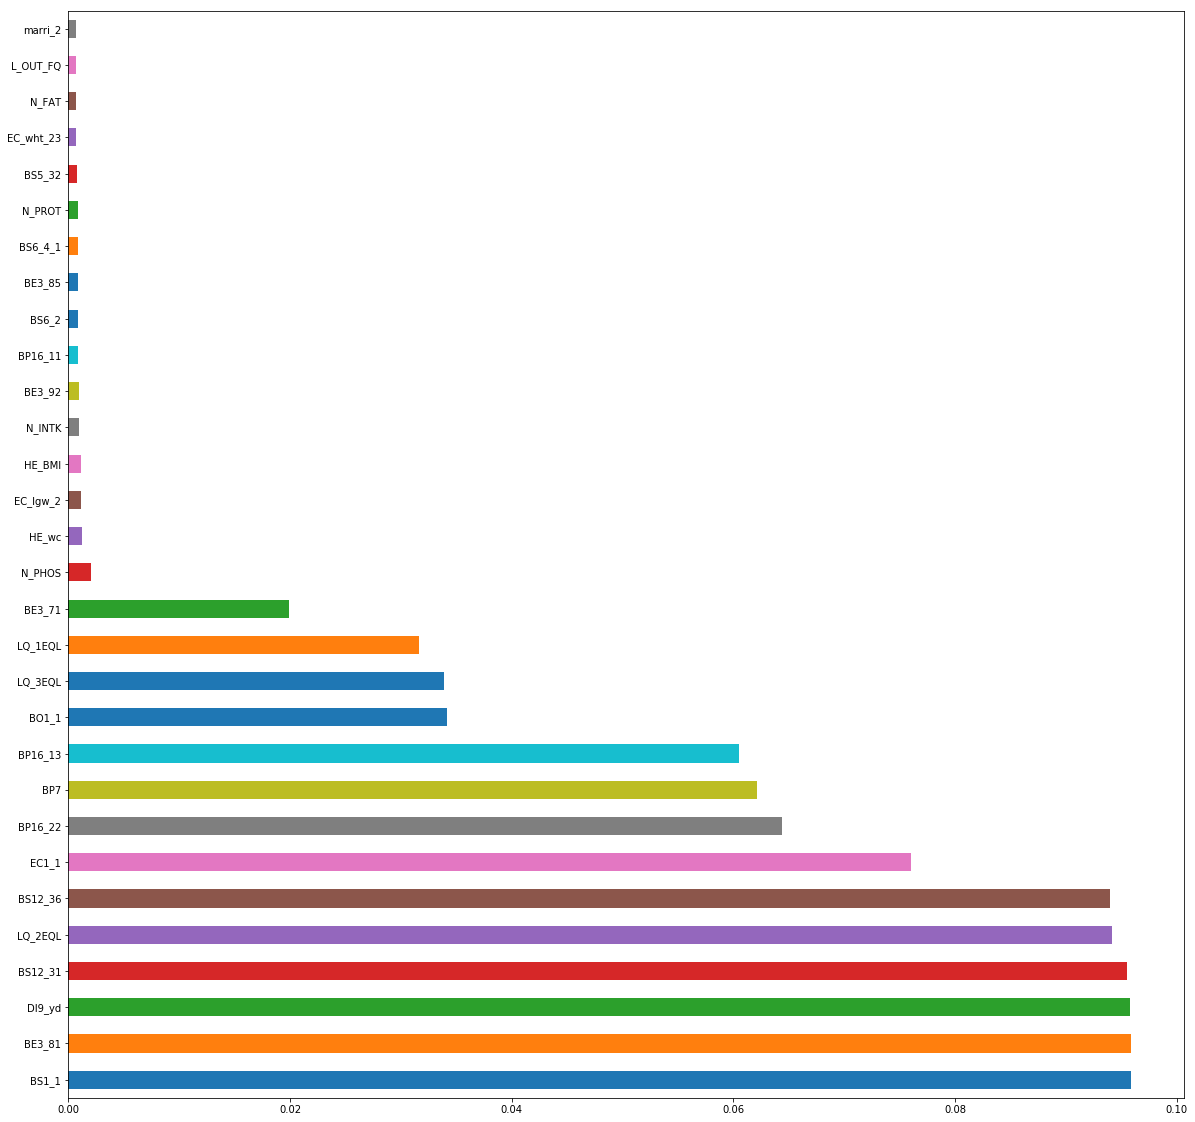

In [15]:
plt.figure(figsize=(20,20))
feat_importances = pd.Series(rf.feature_importances_, index=test_x.columns)
feat_importances.nlargest(30).plot(kind='barh')

In [120]:
#발병 변수 모두 제외한 결과 #1
feat_importances.nlargest(10)

BS12_1       0.192104
LQ_2EQL      0.096198
BM8          0.096132
BS12_32      0.095957
LQ_4EQL      0.095486
BE3_91       0.095343
EC_lgw_4     0.084483
DN6_yd       0.073619
EC_pedu_2    0.064127
BM7          0.031825
dtype: float64

In [16]:
#발병 변수 모두 제외한 결과 #2
feat_importances.nlargest(10)

BS1_1      0.095889
BE3_81     0.095838
DI9_yd     0.095805
BS12_31    0.095507
LQ_2EQL    0.094197
BS12_36    0.093997
EC1_1      0.076051
BP16_22    0.064378
BP7        0.062126
BP16_13    0.060504
dtype: float64

In [17]:
train_x.shape

(4055, 351)

# 중요변수만으로 예측 가즈아

In [22]:
feat_20 = feat_importances.nlargest(20).keys()

In [42]:
feat_20 = feat_20.append(pd.Index(['DC1_dg']))

In [47]:
pre_ = data[feat_20]

In [48]:
pre_.head()

,BS1_1,BE3_81,DI9_yd,BS12_31,LQ_2EQL,BS12_36,EC1_1,BP16_22,BP7,BP16_13,...,LQ_3EQL,LQ_1EQL,BE3_71,N_PHOS,HE_wc,EC_lgw_2,HE_BMI,N_INTK,BE3_92,DC1_dg
0,3.0,2.0,8.0,0.0,1.0,1.0,1.0,0.0,2.0,5.0,...,1.0,1.0,1.0,930.035851,81.4,5.0,21.483406,846.981951,8.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1020.660557,NaN,NaN,NaN,1725.435361,NaN,NaN
2,2.0,2.0,8.0,0.0,1.0,1.0,1.0,0.0,2.0,21.0,...,1.0,1.0,2.0,1177.886606,75.7,9.0,21.268015,1941.845543,8.0,0.0
3,3.0,2.0,8.0,0.0,1.0,1.0,2.0,0.0,2.0,8.0,...,1.0,1.0,2.0,830.767297,77.6,2.0,20.292201,728.108984,2.0,0.0
4,8.0,8.0,0.0,8.0,8.0,8.0,8.0,88.0,8.0,88.0,...,8.0,8.0,8.0,831.596210,48.3,88.0,15.501730,875.438959,8.0,8.0


In [55]:
pre_.dropna(inplace=True)
pre_.reset_index(drop=True,inplace=True)

c:\users\nb-0242\anaconda3\envs\ximz\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [56]:
idx = np.random.choice(np.arange(0,len(pre_)),size=int(len(pre_)*0.8), replace=False)
idx_df = pre_.index.isin(idx)
train_ = pre_[idx_df]
test_ = pre_[~idx_df]

In [57]:
train_x = train_.iloc[:,train_.columns!='DC1_dg']
train_y = train_['DC1_dg']
test_x = test_.iloc[:,test_.columns!='DC1_dg']
test_y = test_['DC1_dg']

In [59]:
rf1 = RandomForestClassifier(n_jobs=-1, )
rf1.fit(train_x,train_y)

c:\users\nb-0242\anaconda3\envs\ximz\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [60]:
test_yhat = rf1.predict(test_x)
np.sum(np.equal(test_yhat, test_y.values.reshape(-1,)))/len(test_y)

0.9895444361463779

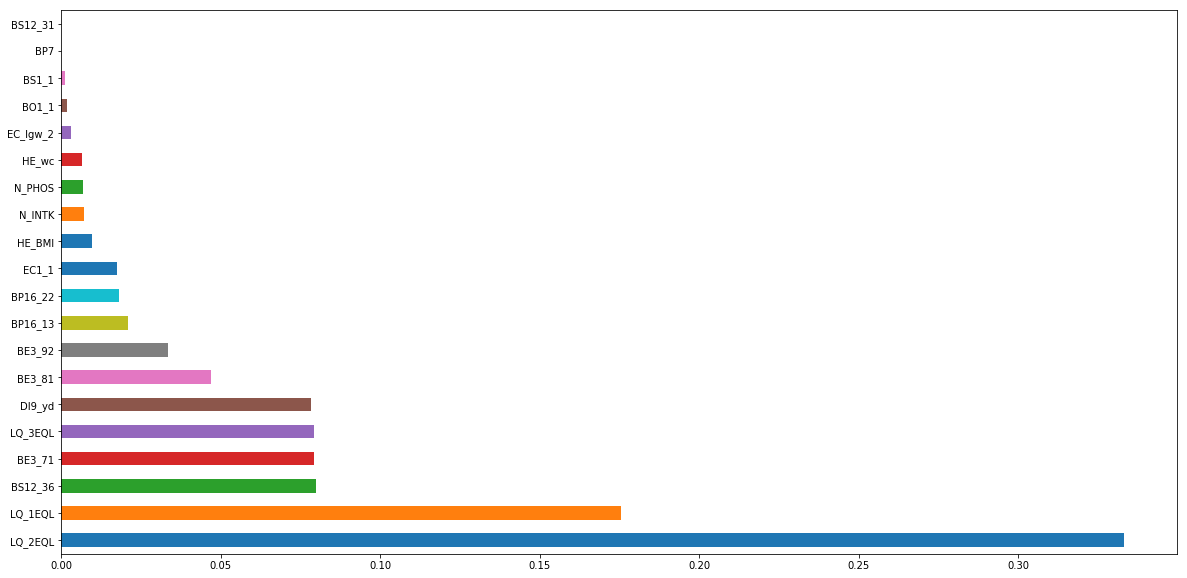

In [65]:
plt.figure(figsize=(20,10))
feat_importances = pd.Series(rf1.feature_importances_, index=test_x.columns)
feat_importances.nlargest(20).plot(kind='barh')

# 전체 데이터셋 ㄱㄱ

In [27]:
mod = sys.modules[__name__]
for year in range(7,18):
    if year//10==0:
        setattr(mod, 'data{}'.format(year),pd.read_sas('c:/users/nb-0242/desktop/PHR/질병관리본부/HN'+str(0)+str(year)+'_ALL.sas7bdat', encoding='latin-1'))
        
    else :
        
        setattr(mod, 'data{}'.format(year), pd.read_sas('c:/users/nb-0242/desktop/PHR/질병관리본부/HN'+str(year)+'_ALL.sas7bdat', encoding='latin-1'))

In [32]:
print(data7.shape)
print(data8.shape)
print(data9.shape)
print(data10.shape)
print(data11.shape)
print(data12.shape)
print(data13.shape)
print(data14.shape)
print(data15.shape)
print(data16.shape)
print(data17.shape)
#존나불편 ;

(4594, 1101)
(9744, 1159)
(10533, 1195)
(8958, 815)
(8518, 812)
(8058, 739)
(8018, 728)
(7550, 727)
(7380, 767)
(8150, 768)
(8127, 819)


In [73]:
d=[]
for year in range(7,18):
    if year//10==0:
        data=pd.read_sas('c:/users/nb-0242/desktop/PHR/질병관리본부/HN'+str(0)+str(year)+'_ALL.sas7bdat', encoding='latin-1')
        d.append(data)
    else :
        data=pd.read_sas('c:/users/nb-0242/desktop/PHR/질병관리본부/HN'+str(year)+'_ALL.sas7bdat', encoding='latin-1')
        d.append(data)
len(d)

11

In [85]:
for i in range(11):
    print(d[i].shape)

(4594, 1101)
(9744, 1159)
(10533, 1195)
(8958, 815)
(8518, 812)
(8058, 739)
(8018, 728)
(7550, 727)
(7380, 767)
(8150, 768)
(8127, 819)


In [102]:
# 2008년은 위암결측치가 많음;
for i in range(11):
    print(d[i]['DC1_dg'].isnull().sum())

1611
2927
482
570
623
721
741
659
476
353
428


<h3> 결측변수 버리고 결측치 버리기 -> 보류

In [69]:
# for i in range(11):
#     d[i] = d[i].iloc[:, d[i].isnull().sum().values <3000]
#     d[i].dropna(inplace=True)

c:\users\nb-0242\anaconda3\envs\ximz\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<h2> 직접 분석하며 결측치 채우고 모델을 통해 데이터셋 별 중요변수 파악 -> 취합 후 최종 변수 도출

<h4> 1. year 2007

In [155]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [116]:
# 여성관련 변수 제거
r = re.compile('^HW_.*')
w_var =list(filter(r.match, d[0].columns))
d7 = d[0].iloc[:, ~d[0].columns.isin(w_var)]

In [117]:
# 가중치 변수 제거
r2 = re.compile('^wt_.*')
weight_var = list(filter(r2.match, d7.columns))
d7 = d7.iloc[:, ~d7.columns.isin(weight_var)]

In [125]:
# 결측 2000개 이상변수 제거
d7 = d7.iloc[:, d7.isnull().sum().values <1700]

In [140]:
d7_ = d7.loc[~d7['DC1_dg'].isnull(),:]

In [143]:
d7_.shape

(2983, 955)

In [144]:
# 결측 관측치 버리기
d7__ = d7_.dropna(inplace=False)

In [145]:
d7__.shape

(1782, 955)

In [158]:
d7__.to_csv('c:/users/nb-0242/desktop/PHR/d7__.csv',index=False,)

# 여기까지 ->위암관련변수 지우고 학습ㄱ

In [148]:
wi_var = list(filter(re.compile('^DC1_.*').match, d7__.columns))

In [153]:
X_train, X_test, y_train, y_test = train_test_split(d7__.iloc[:,3:], d7__['DC1_dg'],test_size=0.2)

(357, 952)